<a href="https://colab.research.google.com/github/jrioss/Mapas-y-poligonos/blob/main/Comunas_med.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cenpy
!pip install datashader
!pip install contextily
!pip install pygeohash
#!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 10.4 MB/s eta 0:00:00
  Created wheel for cenpy: filename=cenpy-1.0.1-py3-none-any.whl size=30061 sha256=2e8427d7a5dc4ad5082236a6c1395b75003c67271938d16d440f24a766aa8549
  Stored in directory: /root/.cache/pip/wheels/ed/a3/b9/ec8f57828ca04f3e5035ad526fc7f4b22c61472e05d919b5af
Successfully built cenpy
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.

In [3]:
#!pip uninstall numpy
#!pip uninstall setuptools
#!pip install setuptools
#!pip install numpy

In [4]:
#!pip install --upgrade pip
#!pip install --upgrade numpy
#!pip install numpy==1.23.5

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import geopandas as gpd
import libpysal.weights as weights
import contextily as ctx
import datashader
import matplotlib.pyplot as plt
import cenpy
#import osmnx
import rasterio as rio
from rasterio.plot import show as rioshow

#from google.colab import drive

# Datos del mapa de Antioquia

In [6]:
col_2 = gpd.read_file("mpio.shx")
#col_2 = gpd.read_file("https://github.com/jrioss/Mapas-y-poligonos/blob/main/Municipio/mpio.shp")
col_2.head()

,geometry
0,"POLYGON ((1290154.980 1796649.425, 1270385.550..."
1,"POLYGON ((1187687.339 1800431.820, 1188158.788..."
2,"POLYGON ((1198031.055 1767210.476, 1212713.613..."
3,"POLYGON ((1156062.702 1755981.216, 1159630.667..."
4,"POLYGON ((1095571.713 1750924.096, 1097255.333..."


In [7]:
municipios = col_2.to_csv('municipios.csv')

In [8]:
col_2.shape

(1122, 1)

In [9]:
col = gpd.read_file("https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json")
col.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360..."
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15950 10.42360, -75.15430 10.409..."
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.21300 7.02750, -72.20610 7.02460..."


In [10]:
col.shape

(33, 6)

In [11]:
tokeep = ["NOMBRE_DPT","geometry"]
datos_polygons = col[tokeep]
datos_polygons.head()

,NOMBRE_DPT,geometry
0,ANTIOQUIA,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."
1,ATLANTICO,"POLYGON ((-74.87060 10.36120, -74.87640 10.343..."
2,SANTAFE DE BOGOTA D.C,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360..."
3,BOLIVAR,"POLYGON ((-75.15950 10.42360, -75.15430 10.409..."
4,BOYACA,"POLYGON ((-72.21300 7.02750, -72.20610 7.02460..."


In [12]:
datos_polygons_ant = datos_polygons.query('NOMBRE_DPT == "ANTIOQUIA"')
datos_polygons_ant

,NOMBRE_DPT,geometry
0,ANTIOQUIA,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."


# Comunas de medellín

In [65]:
#comunas = gpd.read_file("https://www.medellin.gov.co/mapas/rest/services/ServiciosPlaneacion/POT48_Base/MapServer/3/query?where=1%3D1&outFields=*&outSR=4326&f=json")
comunas = gpd.read_file('comunas.txt')
comunas.head()

,OBJECTID,CODIGO,NOMBRE,IDENTIFICACION,LIMITEMUNICIPIOID,SUBTIPO_COMUNACORREGIMIENTO,LINK_DOCUMENTO,SHAPE.AREA,SHAPE.LEN,geometry
0,344,01,Popular,Comuna 1,001,1,NaN,3.098286e+06,9604.982975,"POLYGON ((-75.54803 6.30436, -75.54795 6.30431..."
1,345,02,Santa Cruz,Comuna 2,001,1,NaN,2.195872e+06,8597.709005,"POLYGON ((-75.55703 6.31007, -75.55699 6.31003..."
2,346,03,Manrique,Comuna 3,001,1,NaN,5.096745e+06,12078.235158,"POLYGON ((-75.54252 6.28632, -75.54252 6.28632..."
3,347,04,Aranjuez,Comuna 4,001,1,NaN,4.883730e+06,9643.087768,"POLYGON ((-75.56229 6.29126, -75.56221 6.29125..."
4,348,05,Castilla,Comuna 5,001,1,NaN,6.064362e+06,16098.607962,"POLYGON ((-75.56566 6.31261, -75.56559 6.31259..."


In [66]:
type(comunas)

geopandas.geodataframe.GeoDataFrame

In [67]:
comunas.shape

(23, 10)

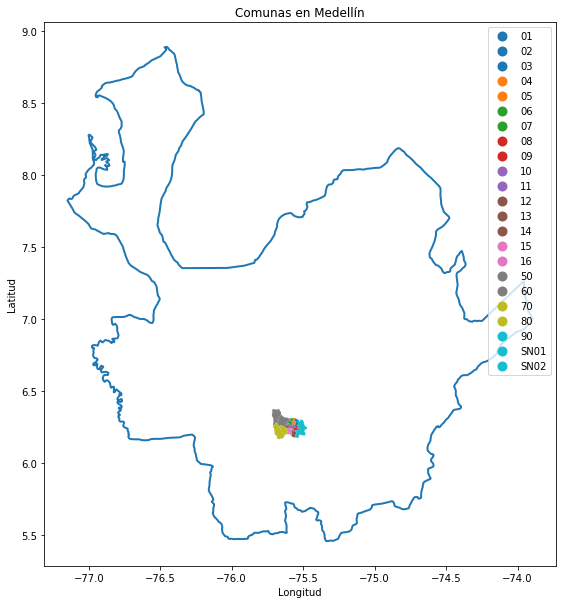

In [68]:
# Plot comunas en mapa de Antioquia
ax = comunas.set_geometry('geometry').plot('CODIGO', markersize=50, figsize=(10,10), legend= True)
datos_polygons_ant.plot('NOMBRE_DPT',ax = ax, facecolor='none', edgecolor='k', linewidth=2)
plt.title('Comunas en Medellín')
plt.ylabel('Latitud')
plt.xlabel('Longitud');

In [140]:
direcciones = pd.read_excel("direcciones.xlsx")
direcciones.head()

,Numero,Guia,Direccion,Ciudad_Destino,Longitud,Latitud
0,1,85910400503861,CALLE 74 B # 87 I 36 SUR,Bogota,-74.201573,4.620067
1,2,85910400505842,CRA 89 A BIS # 80 19 SUR BOSA SANBERNARDINO,Bogota,-74.206462,4.623023
2,3,85910400503645,KRA 100A # 73-14 SUR BOSA RECREO VILLAS DE VIZ...,Bogota,-74.205900,4.634086
3,4,85910400501649,CARRERA 80 M #74C 30 SUR CASA BOSA LAURELES -,Bogota,-74.202180,4.609949
4,5,85910400505019,Calle 65 sur 102 - 51 Santa Monica 5 Casa 194 ...,Bogota,-74.201495,4.638412


In [141]:
direcciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Numero          1396 non-null   int64  
 1   Guia            1396 non-null   int64  
 2   Direccion       1396 non-null   object 
 3   Ciudad_Destino  1396 non-null   object 
 4   Longitud        1396 non-null   float64
 5   Latitud         1396 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 65.6+ KB


In [142]:
dir_med = direcciones[direcciones['Ciudad_Destino'] =="MEDELLIN"]
dir_med = dir_med[dir_med['Longitud'] < 0]
dir_med.head()

,Numero,Guia,Direccion,Ciudad_Destino,Longitud,Latitud
113,114,43655646,CL 107 B CR 42 B 36,MEDELLIN,-75.548154,6.295546
114,115,43660571,CL 107 A 45 33,MEDELLIN,-75.550772,6.295817
115,116,43654197,CL 120 49 C 8,MEDELLIN,-75.551840,6.304134
116,117,43658310,CR 49 A 107 160 IN 1881,MEDELLIN,-75.553070,6.298838
117,118,43660538,CL 125 50 E 23,MEDELLIN,-75.553762,6.307220


In [143]:
#dir_med['Longitud'] = dir_med['Longitud'].apply(float64)

dir_med['Latitud']=pd.to_numeric(dir_med['Latitud'], errors='coerce').fillna(0, downcast='infer')
dir_med['Longitud']=pd.to_numeric(dir_med['Longitud'], errors='coerce').fillna(0, downcast='infer')
dir_med = dir_med.reset_index()

dir_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           743 non-null    int64  
 1   Numero          743 non-null    int64  
 2   Guia            743 non-null    int64  
 3   Direccion       743 non-null    object 
 4   Ciudad_Destino  743 non-null    object 
 5   Longitud        743 non-null    float64
 6   Latitud         743 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 40.8+ KB


In [164]:
dir_med_geo = gpd.points_from_xy(
                                  x = dir_med['Longitud'],
                                  y = dir_med['Latitud'],
                                  crs = "EPSG: 4326"
)

dir_med_geo

<GeometryArray>
[<POINT (-75.548 6.296)>, <POINT (-75.551 6.296)>, <POINT (-75.552 6.304)>,
 <POINT (-75.553 6.299)>, <POINT (-75.554 6.307)>, <POINT (-75.542 6.295)>,
 <POINT (-75.552 6.297)>, <POINT (-75.549 6.297)>, <POINT (-75.556 6.297)>,
 <POINT (-75.543 6.296)>,
 ...
 <POINT (-75.597 6.249)>, <POINT (-75.597 6.248)>, <POINT (-75.592 6.247)>,
  <POINT (-75.59 6.249)>, <POINT (-75.586 6.248)>, <POINT (-75.585 6.249)>,
 <POINT (-75.584 6.248)>, <POINT (-75.582 6.245)>,  <POINT (-75.58 6.244)>,
 <POINT (-75.581 6.244)>]
Length: 743, dtype: geometry

In [165]:
dir_med_p = gpd.GeoDataFrame(dir_med, geometry = dir_med_geo)
dir_med_p.head()

,index,Numero,Guia,Direccion,Ciudad_Destino,Longitud,Latitud,geometry
0,113,114,43655646,CL 107 B CR 42 B 36,MEDELLIN,-75.548154,6.295546,POINT (-75.54815 6.29555)
1,114,115,43660571,CL 107 A 45 33,MEDELLIN,-75.550772,6.295817,POINT (-75.55077 6.29582)
2,115,116,43654197,CL 120 49 C 8,MEDELLIN,-75.551840,6.304134,POINT (-75.55184 6.30413)
3,116,117,43658310,CR 49 A 107 160 IN 1881,MEDELLIN,-75.553070,6.298838,POINT (-75.55307 6.29884)
4,117,118,43660538,CL 125 50 E 23,MEDELLIN,-75.553762,6.307220,POINT (-75.55376 6.30722)


In [172]:
import pygeohash as pgh

dir_med_p['Geohash_6']=dir_med_p.apply(lambda x: pgh.encode(x.Latitud, x.Longitud, precision=6), axis=1)
dir_med_p['Geohash_7']=dir_med_p.apply(lambda x: pgh.encode(x.Latitud, x.Longitud, precision=7), axis=1)
dir_med_p.head()

,index,Numero,Guia,Direccion,Ciudad_Destino,Longitud,Latitud,geometry,Geohash,Densidad,Geohash_6,Geohash_7
0,113,114,43655646,CL 107 B CR 42 B 36,MEDELLIN,-75.548154,6.295546,POINT (-75.54815 6.29555),d347bf,55,d347bf,d347bf5
1,114,115,43660571,CL 107 A 45 33,MEDELLIN,-75.550772,6.295817,POINT (-75.55077 6.29582),d347bf,55,d347bf,d347bf1
2,115,116,43654197,CL 120 49 C 8,MEDELLIN,-75.551840,6.304134,POINT (-75.55184 6.30413),d347bg,52,d347bg,d347bg8
3,116,117,43658310,CR 49 A 107 160 IN 1881,MEDELLIN,-75.553070,6.298838,POINT (-75.55307 6.29884),d347bd,28,d347bd,d347bdx
4,117,118,43660538,CL 125 50 E 23,MEDELLIN,-75.553762,6.307220,POINT (-75.55376 6.30722),d347bs,11,d347bs,d347bsp


In [173]:
# Se crea un Dataframe llamado Geo, para calcular por Geohash cuántas direcciones  hay en ella (La columna Densidad). Se ordena los geohash por mayor Densidad,
# y se ordenan las columnas

geo = dir_med_p[['Geohash_6','Guia']]
geo = geo.groupby(['Geohash_6']).Guia.agg(['count']).rename(columns={'count':'Densidad_6'})
geo['Geohash_6'] = geo.index
geo = geo.sort_values('Densidad_6', ascending = False, ignore_index = False)
geo = geo[['Geohash_6','Densidad_6']]
geo.head(5)

,Geohash_6,Densidad_6
Geohash_6,,
d345xb,d345xb,75
d34723,d34723,56
d347bf,d347bf,55
d34729,d34729,54
d347bg,d347bg,52


In [174]:
geo.shape

(47, 2)

In [175]:
# Unir los Dataframe (Dir_med_p y Geo),  para que así al 1er Dataframe le quede la columna de densidad por Geohash

#d = dir_med_p.copy()
dir_med_p = dir_med_p.join(geo.set_index('Geohash_6'), on='Geohash')
dir_med_p.head()

,index,Numero,Guia,Direccion,Ciudad_Destino,Longitud,Latitud,geometry,Geohash,Densidad,Geohash_6,Geohash_7,Densidad_6
0,113,114,43655646,CL 107 B CR 42 B 36,MEDELLIN,-75.548154,6.295546,POINT (-75.54815 6.29555),d347bf,55,d347bf,d347bf5,55
1,114,115,43660571,CL 107 A 45 33,MEDELLIN,-75.550772,6.295817,POINT (-75.55077 6.29582),d347bf,55,d347bf,d347bf1,55
2,115,116,43654197,CL 120 49 C 8,MEDELLIN,-75.551840,6.304134,POINT (-75.55184 6.30413),d347bg,52,d347bg,d347bg8,52
3,116,117,43658310,CR 49 A 107 160 IN 1881,MEDELLIN,-75.553070,6.298838,POINT (-75.55307 6.29884),d347bd,28,d347bd,d347bdx,28
4,117,118,43660538,CL 125 50 E 23,MEDELLIN,-75.553762,6.307220,POINT (-75.55376 6.30722),d347bs,11,d347bs,d347bsp,11


In [171]:
# Guardar el Dataframe en un archivo .csv
dir_med_p.to_csv('direcciones_geohash.csv')

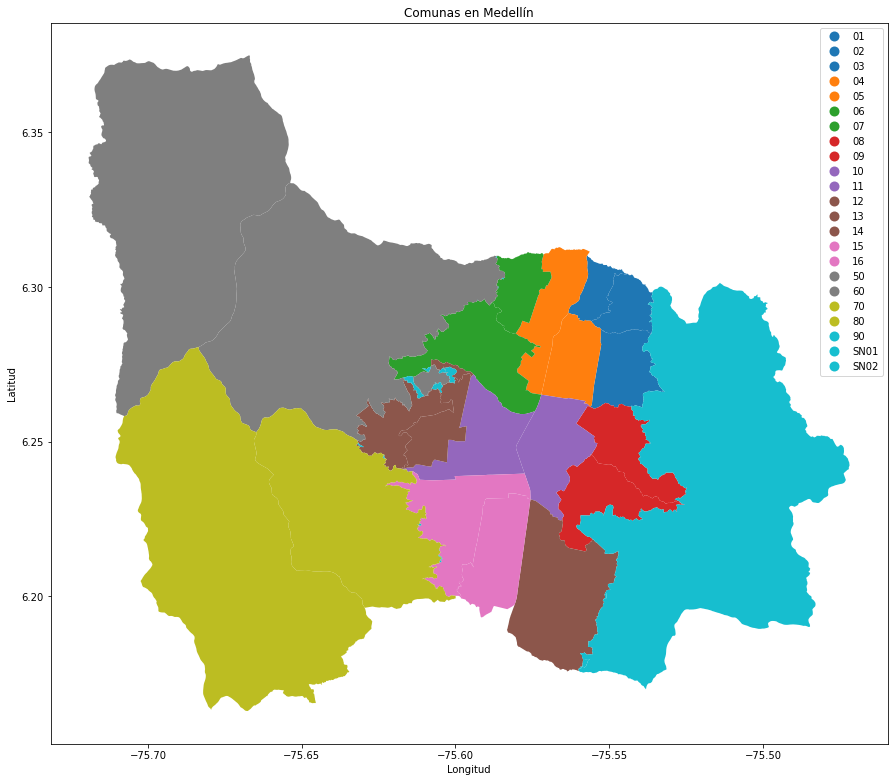

In [76]:
# Plot comunas en Medellín

comunas.set_geometry('geometry').plot('CODIGO', markersize=50, figsize=(15,15), legend= True)
#col_2.plot('geometry',ax = ax, facecolor='none', edgecolor='k', linewidth=2)
plt.title('Comunas en Medellín')
plt.ylabel('Latitud')
plt.xlabel('Longitud');

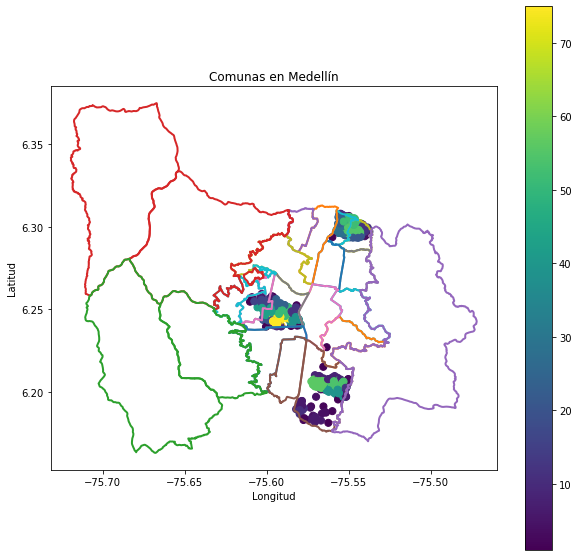

In [157]:
# Plot comunas en mapa de Antioquia (teniendo en cuenta la densidad)

ax = dir_med_p.set_geometry('geometry').plot('Densidad', markersize=50, figsize=(10,10), legend= True)
comunas.plot('NOMBRE',ax = ax,facecolor='none', edgecolor='k', linewidth=2)
plt.title('Comunas en Medellín')
plt.ylabel('Latitud')
plt.xlabel('Longitud');

In [ ]:
import gmaps
import gmaps.datasets

# Use google maps api
gmaps.configure(api_key=api_key) # Fill in with your API key

# Get the dataset
#dir_med_p = gmaps.datasets.load_dataset_as_df('earthquakes')

#Get the locations from the data set
locations = dir_med_p[['Latitud', 'Longitud']]
#Get the magnitude from the data
weights = earthquake_df['magnitude']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

# Datos de las mediciones mensuales por estación

In [ ]:
#Nueva
# Leer los dataframe de las mediciones mensuales de cada estación de medición y el de las ubicaciones de las estaciones


c6_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_6_20210401_20210430.csv')
c6_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_6_20210501_20210531.csv')
c6_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_6_20210601_20210630.csv')
c6_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_6_20210701_20210731.csv')
c11_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_11_20210401_20210430.csv')
c11_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_11_20210501_20210531.csv')
c11_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_11_20210601_20210630.csv')
c11_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_11_20210701_20210731.csv')
c12_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_12_20210401_20210430.csv')
c12_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_12_20210501_20210531.csv')
c12_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_12_20210601_20210630.csv')
c12_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_12_20210701_20210731.csv')
c25_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_25_20210401_20210430.csv')
c25_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_25_20210501_20210531.csv')
c25_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_25_20210601_20210630.csv')
c25_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_25_20210701_20210731.csv')
c28_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_28_20210401_20210430.csv')
c28_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_28_20210501_20210531.csv')
c28_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_28_20210601_20210630.csv')
c28_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_28_20210701_20210731.csv')
c31_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_31_20210401_20210430.csv')
c31_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_31_20210501_20210531.csv')
c31_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_31_20210601_20210630.csv')
c31_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_31_20210701_20210731.csv')
c37_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_37_20210401_20210430.csv')
c37_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_37_20210501_20210531.csv')
c37_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_37_20210601_20210630.csv')
c37_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_37_20210701_20210731.csv')
c38_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_38_20210401_20210430.csv')
c38_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_38_20210501_20210531.csv')
c38_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_38_20210601_20210630.csv')
c38_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_38_20210701_20210731.csv')
c40_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_40_20210401_20210430.csv')
c40_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_40_20210501_20210531.csv')
c40_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_40_20210601_20210630.csv')
c40_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_40_20210701_20210731.csv')
c41_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_41_20210401_20210430.csv')
c41_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_41_20210501_20210531.csv')
c41_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_41_20210601_20210630.csv')
c41_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_41_20210701_20210731.csv')
c43_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_43_20210401_20210430.csv')
c43_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_43_20210501_20210531.csv')
c43_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_43_20210601_20210630.csv')
c43_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_43_20210701_20210731.csv')
c44_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_44_20210401_20210430.csv')
c44_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_44_20210501_20210531.csv')
c44_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_44_20210601_20210630.csv')
c44_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_44_20210701_20210731.csv')
c46_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_46_20210401_20210430.csv')
c46_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_46_20210501_20210531.csv')
c46_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_46_20210601_20210630.csv')
c46_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_46_20210701_20210731.csv')
c48_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_48_20210401_20210430.csv')
c48_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_48_20210501_20210531.csv')
c48_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_48_20210601_20210630.csv')
c48_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_48_20210701_20210731.csv')
c69_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_69_20210401_20210430.csv')
c69_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_69_20210501_20210531.csv')
c69_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_69_20210601_20210630.csv')
c69_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_69_20210701_20210731.csv')
c74_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_74_20210401_20210430.csv')
c74_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_74_20210501_20210531.csv')
c74_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_74_20210601_20210630.csv')
c74_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_74_20210701_20210731.csv')
c78_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_78_20210401_20210430.csv')
c78_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_78_20210501_20210531.csv')
c78_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_78_20210601_20210630.csv')
c78_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_78_20210701_20210731.csv')
c79_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_79_20210401_20210430.csv')
c79_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_79_20210501_20210531.csv')
c79_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_79_20210601_20210630.csv')
c79_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_79_20210701_20210731.csv')
c80_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_80_20210401_20210430.csv')
c80_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_80_20210501_20210531.csv')
c80_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_80_20210601_20210630.csv')
c80_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_80_20210701_20210731.csv')
c81_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_81_20210401_20210430.csv')
c81_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_81_20210501_20210531.csv')
c81_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_81_20210601_20210630.csv')
c81_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_81_20210701_20210731.csv')
c82_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_82_20210401_20210430.csv')
c82_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_82_20210501_20210531.csv')
c82_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_82_20210601_20210630.csv')
c82_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_82_20210701_20210731.csv')
c83_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_83_20210401_20210430.csv')
c83_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_83_20210501_20210531.csv')
c83_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_83_20210601_20210630.csv')
c83_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_83_20210701_20210731.csv')
c84_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_84_20210401_20210430.csv')
c84_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_84_20210501_20210531.csv')
c84_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_84_20210601_20210630.csv')
c84_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_84_20210701_20210731.csv')
c85_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_85_20210401_20210430.csv')
c85_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_85_20210501_20210531.csv')
c85_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_85_20210601_20210630.csv')
c85_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_85_20210701_20210731.csv')
c86_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_86_20210401_20210430.csv')
c86_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_86_20210501_20210531.csv')
c86_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_86_20210601_20210630.csv')
c86_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_86_20210701_20210731.csv')
c87_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_87_20210401_20210430.csv')
c87_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_87_20210501_20210531.csv')
c87_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_87_20210601_20210630.csv')
c87_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_87_20210701_20210731.csv')
c88_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_88_20210401_20210430.csv')
c88_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_88_20210501_20210531.csv')
c88_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_88_20210601_20210630.csv')
c88_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_88_20210701_20210731.csv')
c90_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_90_20210401_20210430.csv')
c90_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_90_20210501_20210531.csv')
c90_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_90_20210601_20210630.csv')
c90_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_90_20210701_20210731.csv')
c92_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_92_20210401_20210430.csv')
c92_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_92_20210501_20210531.csv')
c92_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_92_20210601_20210630.csv')
c92_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_92_20210701_20210731.csv')
c94_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_94_20210401_20210430.csv')
c94_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_94_20210501_20210531.csv')
c94_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_94_20210601_20210630.csv')
c94_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_94_20210701_20210731.csv')
c100_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_100_20210401_20210430.csv')
c100_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_100_20210501_20210531.csv')
c100_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_100_20210601_20210630.csv')
c100_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_100_20210701_20210731.csv')
c101_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_101_20210401_20210430.csv')
c101_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_101_20210501_20210531.csv')
c101_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_101_20210601_20210630.csv')
c101_4 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/Nueva/estacion_data_calidadaire_101_20210701_20210731.csv')


In [ ]:
# Antigua
# Leer los dataframe de las mediciones mensuales de cada estación de medición y el de las ubicaciones de las estaciones
c6_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_6_20210101_20210131.csv')
c6_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_6_20210201_20210228.csv')
c6_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_6_20210301_20210331.csv')
c11_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_11_20210101_20210131.csv')
c11_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_11_20210201_20210228.csv')
c11_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_11_20210301_20210331.csv')
c25_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_25_20210101_20210131.csv')
c25_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_25_20210201_20210228.csv')
c25_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_25_20210301_20210331.csv')
c28_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_28_20210101_20210131.csv')
c28_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_28_20210201_20210228.csv')
c28_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_28_20210301_20210331.csv')
c31_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_31_20210101_20210131.csv')
c31_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_31_20210201_20210228.csv')
c31_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_31_20210301_20210331.csv')
c37_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_37_20210101_20210131.csv')
c37_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_37_20210201_20210228.csv')
c37_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_37_20210301_20210331.csv')
c41_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_41_20210101_20210131.csv')
c41_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_41_20210201_20210228.csv')
c41_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_41_20210301_20210331.csv')
c43_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_43_20210101_20210131.csv')
c43_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_43_20210201_20210228.csv')
c43_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_43_20210301_20210331.csv')
c44_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_44_20210101_20210131.csv')
c44_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_44_20210201_20210228.csv')
c44_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_44_20210301_20210331.csv')
c46_1 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_46_20210101_20210131.csv')
c46_2 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_46_20210201_20210228.csv')
c46_3 = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Analisis Geo/estacion_data_calidadaire_46_20210301_20210331.csv')

In [ ]:
# Vieja
# Unir para cada estación los dataframe de las mediciones mensuales
c6 = c6_1.append(c6_2).append(c6_3)
c11 = c11_1.append(c11_2).append(c11_3)
c25 = c25_1.append(c25_2).append(c25_3)
c28 = c28_1.append(c28_2).append(c28_3)
c31 = c31_1.append(c31_2).append(c31_3)
c37 = c37_1.append(c37_2).append(c37_3)
c41 = c41_1.append(c41_2).append(c41_3)
c43 = c43_1.append(c43_2).append(c43_3)
c44 = c44_1.append(c44_2).append(c44_3)
c46 = c46_1.append(c46_2).append(c46_3)

In [ ]:
# Nueva
# Unir para cada estación los dataframe de las mediciones mensuales
c6 = c6_1.append(c6_2).append(c6_3).append(c6_4)
c11 = c11_1.append(c11_2).append(c11_3).append(c11_4)
c12 = c12_1.append(c12_2).append(c12_3).append(c12_4)
c25 = c25_1.append(c25_2).append(c25_3).append(c25_4)
c28 = c28_1.append(c28_2).append(c28_3).append(c28_4)
c31 = c31_1.append(c31_2).append(c31_3).append(c31_4)
c37 = c37_1.append(c37_2).append(c37_3).append(c37_4)
c38 = c38_1.append(c38_2).append(c38_3).append(c38_4)
c40 = c40_1.append(c40_2).append(c40_3).append(c40_4)
c41 = c41_1.append(c41_2).append(c41_3).append(c41_4)
c43 = c43_1.append(c43_2).append(c43_3).append(c43_4)
c44 = c44_1.append(c44_2).append(c44_3).append(c44_4)
c46 = c46_1.append(c46_2).append(c46_3).append(c46_4)
c48 = c48_1.append(c48_2).append(c48_3).append(c48_4)
c69 = c69_1.append(c69_2).append(c69_3).append(c69_4)
c74 = c74_1.append(c74_2).append(c74_3).append(c74_4)
c78 = c78_1.append(c78_2).append(c78_3).append(c78_4)
c79 = c79_1.append(c79_2).append(c79_3).append(c79_4)
c80 = c80_1.append(c80_2).append(c80_3).append(c80_4)
c81 = c81_1.append(c81_2).append(c81_3).append(c81_4)
c82 = c82_1.append(c82_2).append(c82_3).append(c82_4)
c83 = c83_1.append(c83_2).append(c83_3).append(c83_4)
c84 = c84_1.append(c84_2).append(c84_3).append(c84_4)
c85 = c85_1.append(c85_2).append(c85_3).append(c85_4)
c86 = c86_1.append(c86_2).append(c86_3).append(c86_4)
c87 = c87_1.append(c87_2).append(c87_3).append(c87_4)
c88 = c88_1.append(c88_2).append(c88_3).append(c88_4)
c90 = c90_1.append(c90_2).append(c90_3).append(c90_4)
c92 = c92_1.append(c92_2).append(c92_3).append(c92_4)
c94 = c94_1.append(c94_2).append(c94_3).append(c94_4)
c100 = c100_1.append(c100_2).append(c100_3).append(c100_4)
c101 = c101_1.append(c101_2).append(c101_3).append(c101_4)

In [ ]:
c6.head()

In [ ]:
# Agregar una columna llamada "Estación", la cual tiene el valor de estación de  medicion
c6['estacion'] = list("6")*c6.shape[0]
c11['estacion'] = list(["11"])*c11.shape[0]
c25['estacion'] = list(["25"])*c25.shape[0]
c28['estacion'] = list(["28"])*c28.shape[0]
c31['estacion'] = list(["31"])*c31.shape[0]
c37['estacion'] = list(["37"])*c37.shape[0]
c41['estacion'] = list(["41"])*c41.shape[0]
c43['estacion'] = list(["43"])*c43.shape[0]
c44['estacion'] = list(["44"])*c44.shape[0]
c46['estacion'] = list(["46"])*c46.shape[0]


In [ ]:
# Agregar una columna llamada "Estación", la cual tiene el valor de estación de  medicion
c6['estacion'] = list("6")*c6.shape[0]
c11['estacion'] = list(["11"])*c11.shape[0]
c12['estacion'] = list(["12"])*c12.shape[0]
c25['estacion'] = list(["25"])*c25.shape[0]
c28['estacion'] = list(["28"])*c28.shape[0]
c31['estacion'] = list(["31"])*c31.shape[0]
c37['estacion'] = list(["37"])*c37.shape[0]
c38['estacion'] = list(["38"])*c38.shape[0]
c40['estacion'] = list(["40"])*c40.shape[0]
c41['estacion'] = list(["41"])*c41.shape[0]
c43['estacion'] = list(["43"])*c43.shape[0]
c44['estacion'] = list(["44"])*c44.shape[0]
c46['estacion'] = list(["46"])*c46.shape[0]
c48['estacion'] = list(["48"])*c48.shape[0]
c69['estacion'] = list(["69"])*c69.shape[0]
c74['estacion'] = list(["74"])*c74.shape[0]
c78['estacion'] = list(["78"])*c78.shape[0]
c79['estacion'] = list(["79"])*c79.shape[0]
c80['estacion'] = list(["80"])*c80.shape[0]
c81['estacion'] = list(["81"])*c81.shape[0]
c82['estacion'] = list(["82"])*c82.shape[0]
c83['estacion'] = list(["83"])*c83.shape[0]
c84['estacion'] = list(["84"])*c84.shape[0]
c85['estacion'] = list(["85"])*c85.shape[0]
c86['estacion'] = list(["86"])*c86.shape[0]
c87['estacion'] = list(["87"])*c87.shape[0]
c88['estacion'] = list(["88"])*c88.shape[0]
c90['estacion'] = list(["90"])*c90.shape[0]
c92['estacion'] = list(["92"])*c92.shape[0]
c94['estacion'] = list(["94"])*c94.shape[0]
c100['estacion'] = list(["100"])*c100.shape[0]
c101['estacion'] = list(["101"])*c101.shape[0]


In [ ]:
#Vieja
# Unir en un solo dataframe todas las tablas de las mediciones de aire de las estaciones totales
c = c6.append(c11).append(c25).append(c28).append(c31).append(c37).append(c41).append(c43).append(c44).append(c46)
c.head()

In [ ]:
#Nueva
# Unir en un solo dataframe todas las tablas de las mediciones de aire de las estaciones totales
c = c6.append(c11).append(c12).append(c25).append(c28).append(c31).append(c37).append(c38).append(c40).append(c41).append(c43).append(c44).append(c46).append(c48).append(c69).append(c74).append(c78).append(c79).append(c80).append(c81).append(c82).append(c83).append(c84).append(c85).append(c86).append(c87).append(c88).append(c90).append(c92).append(c94).append(c100).append(c101)
c.head()

In [ ]:
type(c)

In [ ]:
type(estaciones)

In [ ]:
# Unir las tablas que tienen las mediciones de las estaciones, con el que tiene las ubicaciones de las mismas. Key para ello es la vble "código"
db = c.set_index('estacion').join(estaciones.set_index('Codigo'))
db.head()

In [ ]:
type(db)

In [ ]:
db.shape

In [ ]:
#db.to_csv('prueba.csv', index = True, sep = "\t")

In [ ]:
db.describe()

In [ ]:
db[db['calidad_pm25'] < 2.6 ]

In [ ]:
#db_buenos = db[db['pm25'] > 4][['Fecha_Hora','codigoSerial','pm25', 'calidad_pm25','pm10', 'calidad_pm10', 'pm1', 'calidad_pm1','no','calidad_no','Longitud','Latitud']]

In [ ]:
#db = db[['Fecha_Hora','codigoSerial','pm25', 'calidad_pm25','Longitud','Latitud']]
#db

In [ ]:
db_buenos = db[db['calidad_pm25'] < 2.6][['Fecha_Hora','codigoSerial','pm25', 'calidad_pm25','pm10', 'calidad_pm10', 'pm1', 'calidad_pm1','taire10_ssr','calidad_taire10_ssr','Ciudad','Longitud','Latitud']]
db_buenos = db_buenos[db_buenos['pm25'] != -9999.0][['Fecha_Hora','codigoSerial','pm25', 'calidad_pm25','pm10', 'calidad_pm10', 'pm1', 'calidad_pm1','taire10_ssr','calidad_taire10_ssr','Ciudad','Longitud','Latitud']]
db_buenos

In [ ]:
db_buenos.describe()

EMPIEZAN CORRECCIONES

In [ ]:
db.head()

In [ ]:
# Convertir la vble Codigo en una vble tipo string
db_buenos['codigoSerial'] = db_buenos['codigoSerial'].apply(str)
db_buenos

In [ ]:
#Escogemos la fecha únicamente
db_buenos['Fecha_Hora'] = db_buenos['Fecha_Hora'].str[:10]
db_buenos

In [ ]:
db_buenos.shape

In [ ]:
tab = pd.crosstab(index=db_buenos["codigoSerial"],columns="frecuencia")
print(tab)

In [ ]:
tab_cp = pd.crosstab(index=db_buenos["calidad_pm25"],columns="frecuencia")
print(tab_cp)

In [ ]:
db.shape

In [ ]:
db_buenos.shape

In [ ]:
#Ensayo
#tab_buenos_f = db_buenos[db_buenos['codigoSerial']== 28]
#tab_buenos_f

Seleccionando el máximo valor de pm25 de cada dia y codigo

In [ ]:
#tab_buenos_f = db_buenos.groupby(['Fecha_Hora']).max('pm25')
db_buenos_f = db_buenos.groupby(['codigoSerial','Fecha_Hora']).agg('max')
db_buenos_f

In [ ]:
db_buenos_ff = db_buenos_f.reset_index()
db_buenos_ff

In [ ]:
db_buenos_ff.shape

In [ ]:
#Convertir el dataframe db en Geodataframe
#Construir el parámetro geometry para la fnc GeoDataFrame de Geopandas
pt_geoms = gpd.points_from_xy(x=db_buenos_ff["Longitud"],
                            y=db_buenos_ff["Latitud"],
                            crs="EPSG:4326"
                            )

In [ ]:
# Aplicar la fnc GeoDataFrame de Geopandas con el parámetro anteriormente construido
db_points = gpd.GeoDataFrame(db_buenos_ff,geometry = pt_geoms)
db_points.head()

In [ ]:
tab_points = pd.crosstab(index=db_points["codigoSerial"],columns="frecuencia")
print(tab_points)

In [ ]:
type(db_points)

In [ ]:
db_points.shape

In [ ]:
# Me indica en qué sistema de coordenadas geográfica está el geodataframe
db_points.crs

In [ ]:
# Gráfico de todas las estaciones
cvs = datashader.Canvas(plot_width=60,plot_height=60)
grid = cvs.points(estaciones_points, x="Longitud", y="Latitud")
f, axs = plt.subplots(1, 2, figsize=(14, 6))
estaciones_points.plot(ax=axs[0])
grid.plot(ax=axs[1]);

In [ ]:
# Gráfico de las estaciones filtradas
cvs = datashader.Canvas(plot_width=60,plot_height=60)
grid = cvs.points(db_points, x="Longitud", y="Latitud")
f, axs = plt.subplots(1, 2, figsize=(14, 6))
db_points.plot(ax=axs[0])
grid.plot(ax=axs[1]);

In [ ]:
# Plot todas las estaciones
# Plot polygons without color filling
ax = estaciones_points.set_geometry('geometry').plot('Codigo', markersize=50, figsize=(10,10), legend= True)
datos_polygons_ant.plot('NOMBRE_DPT',ax= ax, facecolor='none', edgecolor='k', linewidth=2)
plt.title('Estaciones metereológicas en el Valle de Aburrá')
plt.ylabel('Latitud')
plt.xlabel('Longitud');

In [ ]:
# Plot estaciones filtradas
ax = db_points.set_geometry('geometry').plot('codigoSerial', markersize=50, figsize=(10,10), legend= True)
datos_polygons_ant.plot('NOMBRE_DPT',ax= ax, facecolor='none', edgecolor='k', linewidth=2)
plt.title('Estaciones metereológicas en el Valle de Aburrá')
plt.ylabel('Latitud')
plt.xlabel('Longitud');

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [ ]:
# Plot estaciones filtradas
#ax = db_points.set_geometry('geometry').plot('codigoSerial', markersize=50, figsize=(10,10), legend= True)
datos_polygons_ant.plot('NOMBRE_DPT',facecolor='none', edgecolor='k', linewidth=2)
plt.title('Estaciones metereológicas en el Valle de Aburrá')
plt.ylabel('Latitud')
plt.xlabel('Longitud');

In [ ]:
#Crea un polígono
db_points_ch = db_points.unary_union.convex_hull
db_points_ch

## Amenity

In [ ]:
#pois = osmnx.geometries_from_polygon(db_points_ch, tags={"amenity": ['restaurant', 'bar', 'building']})
pois = osmnx.geometries_from_polygon(db_points_ch, tags = {"amenity":['restaurant', 'bar'], "landuse":['retail','commercial'], "highway":'bus_stop'})

In [ ]:
pois.groupby('amenity').amenity.count()

In [ ]:
f,ax = plt.subplots(1,figsize=(12, 12))
db_points.plot(ax=ax, marker='.')
pois.plot(ax=ax, color='r')
ctx.add_basemap(
    ax, 
    crs='EPSG:4326', 
    source=ctx.providers.Stamen.TonerLite
)

#ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.Stamen.TonerLite)

In [ ]:
map = osmnx.graph.graph_from_point([6.37836,-75.44389], dist=1000, dist_type='bbox', network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)


#G = osmnx.graph_from_point((6.37836,-75.44389), dist=750, network_type='all')
osmnx.plot_graph(map)

In [ ]:
#places = ['Medellin, Antioquia, COL',
#          {'city':'Medellin', 'state':'Antioquia'},
#          'Medellin, Antioquia']
#G = osmnx.graph_from_place(places, network_type='drive')
#osmnx.plot_graph(G)

G = osmnx.graph_from_place('Medellin, Antioquia', network_type='drive')
osmnx.plot_graph(G)

In [ ]:
# Exportar el archivo
db.to_csv('prueba.csv', index = True, sep = "\t")

In [ ]:
#import mapclassify
#from shapely.geometry import Point, LineString, Polygon
#fig, ax = plt.subplots(figsize=(12,10))
#db_points.plot(column='pm25', scheme='QUANTILES', k=5, colormap='OrRd',  ax=ax, legend=True);

# Formato Tidy

In [ ]:
#c = c.index('Fecha_Hora')
#c

In [ ]:
#tidy_subgroups = c.stack()
#tidy_subgroups.head()

In [ ]:
#type(tidy_subgroups)

In [ ]:
# Unfold the multi-index into different, new columns
#tidy_subgroupsDF = tidy_subgroups.reset_index()
#tidy_subgroupsDF.head()

In [ ]:
#tidy_subgroupsDF = tidy_subgroupsDF.rename(columns={'level_1': 'Contaminante', 0: 'Frec'})
#tidy_subgroupsDF.head()

In [ ]:
#tidy_subgroupsDF.info()

## ESDA

In [ ]:
db_points = db_points.rename(columns = {"codigoSerial": "Codigo", "Fecha_Hora": "Fecha"})
db_points.head(5)

In [ ]:
!pip install pysal

In [ ]:
%matplotlib inline

import seaborn as sns
import pandas as pd
from pysal.lib import weights
from pysal.explore import esda
from pysal.viz import splot
from splot.esda import plot_moran
#from pysal.viz.splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [ ]:
db_points_p = db_points[db_points['Fecha']=='2021-04-01']
db_points_p['Codigos']=db_points_p['Codigo']
db_points_p=db_points_p.set_index('Codigos')
db_points_p = db_points_p.rename(columns = {"Codigo": "Codigos"})
db_points_p

In [ ]:
estaciones_points.info()

In [ ]:
estaciones_points.head(5)

In [ ]:
tab_est = pd.crosstab(index=estaciones_points["Ciudad"],columns="frecuencia")
print(tab_est)

In [ ]:
tab_est = pd.crosstab(index=db_points["Fecha"],columns="frecuencia")
print(tab_est)

In [ ]:
ax = db_points_p.plot(column="Ciudad", figsize=(9, 9), alpha=0.5);
ctx.add_basemap(ax, crs=db_points_p.crs)

In [ ]:
fig, ax = plt.subplots(1, figsize=(9, 9))
db_points.plot(column='pm25', scheme='Quantiles', legend=True, ax=ax)
ax.set_axis_off()
fig.set_facecolor('0.75')
fig.suptitle('micras de pm2.5', size=15)
plt.show()

In [ ]:
ax = db_points.plot(column="Codigo", figsize=(9, 9), alpha=0.5);
ctx.add_basemap(ax, crs=db_points.crs)

In [ ]:
ax = estaciones_points.plot(column="Ciudad", figsize=(9, 9), alpha=1);
ctx.add_basemap(ax, crs=estaciones_points.crs)

## 1.1. Contiguity

In [ ]:
db_points_p.shape

In [ ]:
#w_queen = weights.Queen.from_dataframe(estaciones_points, idVariable="Codigo")
w_queen = weights.Queen.from_dataframe(db_points_p, idVariable="Codigos")
w_queen

In [ ]:
w_rook = weights.Rook.from_dataframe(db_points_p, idVariable="Codigos")
w_rook

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(12,12))
ax1, ax2 = axs
db_points_p.plot(edgecolor='grey', facecolor='w', ax=ax1)
w_queen.plot(db_points_p, ax=ax1, edge_kws=dict(color='r', linestyle=':', linewidth=1),node_kws=dict(marker=''))
ax1.set_axis_off()
db_points_p.plot(edgecolor='grey', facecolor='w', ax=ax2)
w_rook.plot(db_points_p, ax=ax2, edge_kws=dict(color='r', linestyle=':', linewidth=1),node_kws=dict(marker=''))
ax2.set_axis_off()

In [ ]:
w_queen['12']

In [ ]:
w_queen.neighbors['12']

In [ ]:
w_queen.weights['12']

In [ ]:
w_queen.cardinalities['12']

In [ ]:
# se ve para cada Código el valor de los vecinos que tiene según Queen
queen_card = pd.Series(w_queen.cardinalities)
queen_card.head(10)

In [ ]:
sns.distplot(queen_card, bins=10)

# En promedio los vecinos para los códigos de estaciones de aire esta entre 4 a 5.
# No hay códigos con vecinos igual a 0, es decir, no hay islas.

In [ ]:
# Number of observations
w_queen.n

In [ ]:
# Average number of neighbors
# Tal y como se mencionó arriba, el promedio de vecinos de los códigos de estaciones de aire es 4.32
w_queen.mean_neighbors

In [ ]:
# Min number of neighbors
# El mínimo de vecinos de los códigos de estaciones de aire es 1
w_queen.min_neighbors

In [ ]:
# El máximo de vecinos de los códigos de estaciones de aire es 7
w_queen.max_neighbors

In [ ]:
f, ax = plt.subplots(1, figsize=(6, 6))
db_points_p.plot(ax=ax, facecolor='k', linewidth=0.1)
focus = db_points_p.loc[['12'], ['geometry']]
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
neis = db_points_p.loc[w_queen['12'], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
f.suptitle("Queen neighbors of `12`")
plt.show()

# En el gráfico se puede observar los vecinos más cercanos (contiguidad Queen) con el código 12

In [ ]:
w_queen.islands

In [ ]:
# Create the spatial weights matrix
w = weights.Queen.from_dataframe(db_points_p, idVariable='Codigos')

In [ ]:
# Row standardize the matrix
w.transform = 'R'

In [ ]:
w['12']

# 1.2 Distancia

## 1.2.1 K-Nearest Neighbors

In [ ]:
#EPSG:3114: MAGNA-SIRGAS / Colombia Far West zone
#EPSG:3115: MAGNA-SIRGAS / Colombia West zone
#EPSG:3116: MAGNA-SIRGAS / Colombia Bogota zone
#EPSG:3117: MAGNA-SIRGAS / Colombia East Central zone
#EPSG:3118: MAGNA-SIRGAS / Colombia East zone
#EPSG:21891: Bogota 1975 / Colombia West zone
#EPSG:21892: Bogota 1975 / Colombia Bogota zone
#EPSG:21893: Bogota 1975 / Colombia East Central zone
db_points_p.crs

In [ ]:
imd=db_points_p.to_crs(epsg=3115)

In [ ]:
imd.crs

In [ ]:
# Se definió como vecinos más cercanos los 4 más cercanos
knn4 = weights.KNN.from_dataframe(imd, k=4)

In [ ]:
cents = imd.centroid

# Extract coordinates into an array
pts = pd.DataFrame({"X": cents.x,"Y": cents.y}).values
knn4_from_pts = weights.KNN.from_array(pts, k=4)
knn4_from_pts

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(12,12))
ax1, ax2 = axs
db_points_p.plot(edgecolor='grey', facecolor='w', ax=ax1)
w_queen.plot(db_points_p, ax=ax1, edge_kws=dict(color='r', linestyle=':', linewidth=1),node_kws=dict(marker=''))
ax1.set_axis_off()
imd.plot(edgecolor='grey', facecolor='w', ax=ax2)
knn4.plot(imd, ax=ax2, edge_kws=dict(color='r', linestyle=':', linewidth=1),node_kws=dict(marker=''))
ax2.set_axis_off()

#Al lado izquierdo los vecinos según Queen 

In [ ]:
knn4['12']

In [ ]:
knn4.weights['12']

In [ ]:
knn4.neighbors['12']

In [ ]:
# Cada código de estacion de aire tiene 4 vecinos, tal y coóm o se le indicen el k=4

knn4_card = pd.Series(knn4.cardinalities)
knn4_card

In [ ]:
# En el método de Queen no hay restricción del número de vecinos, desde que cumplan con la contiguidad planteada
queen_card

# 1.3 Band distance

In [ ]:
w_dist5kmB = weights.DistanceBand.from_dataframe(imd, 5000)
w_dist5kmB

In [ ]:
w_dist5kmB['12']

In [ ]:
w_dist5kmC = weights.DistanceBand.from_dataframe(imd, 5000, binary=False)

In [ ]:
w_dist5kmC['12']

In [ ]:
# Setup figure
f, ax = plt.subplots(1, figsize=(10, 10))
# Plot base layer of polygons
imd.plot(ax=ax, facecolor='k', linewidth=0.1)
# Select focal polygon
# NOTE we pass both the area code and the column name
#      (`geometry`) within brackets!!!
focus = imd.loc[['12'], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='yellow', alpha=1, linewidth=1, ax=ax)
# Plot neighbors
neis = imd.loc[w_dist50kmC['12'], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
# Plot 1km buffer
buf = focus.centroid.buffer(5000)
buf.plot(edgecolor='red', facecolor='none', ax=ax, linewidth=4)
# Plot centroids of neighbor
pts = np.array([(pt.x, pt.y) for pt in imd.centroid])
ax.plot(pts[:, 0], pts[:, 1], color='#00d8ea', 
        linewidth=0, alpha=0.75, marker='o', markersize=4)
# Title
f.suptitle("Neighbors within 5km of `12`")
# Style, zoom and display on screen
#ax.set_ylim(388000, 393500)
#ax.set_xlim(336000, 339500)
plt.show()

In [ ]:
min_thr = weights.min_threshold_distance(pts)
min_thr

In [ ]:
w_min_dist = weights.DistanceBand.from_dataframe(imd, min_thr, binary=False)

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(12,12))
ax1, ax2 = axs
db_points_p.plot(edgecolor='grey', facecolor='w', ax=ax1)
w_dist5kmB.plot(db_points_p, ax=ax1, edge_kws=dict(color='r', linestyle=':', linewidth=1),node_kws=dict(marker=''))
ax1.set_axis_off()
imd.plot(edgecolor='grey', facecolor='w', ax=ax2)
w_min_dist.plot(imd, ax=ax2, edge_kws=dict(color='r', linestyle=':', linewidth=1),node_kws=dict(marker=''))
ax2.set_axis_off()

# 2. Spatial lag

In [ ]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(imd, k=5)
# Row-standardization
w.transform = 'R'

In [ ]:
db_points_p['w_pm25'] = weights.lag_spatial(w, db_points_p['pm25'])

In [ ]:
db_points_p[['Codigos', 'pm25', 'w_pm25']].head()

# En la tabla podemos observar el valor PM2.5 de cada código de estación de aire, y la del promedio de sus vecinos
# Los codigos 100,12 y 48 son muy diferentes con sus vecinos

In [ ]:
# Si deseamos comprobar los resultados, se consulta el código 12
w.neighbors['12']

In [ ]:
neis = db_points_p.loc[w.neighbors['12'], 'pm25']
neis

In [ ]:
neis.mean()

In [ ]:
# Para comparar los gráficos de dispersión, vamos a estandarizar los valores de la variable antes de calcular su retraso espacial y graficarlo
db_points_p['pm25_std'] = (db_points_p['pm25'] - db_points_p['pm25'].mean()) / db_points_p['pm25'].std()

In [ ]:
db_points_p['w_pm25_std'] = weights.lag_spatial(w, db_points_p['pm25_std'])

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(12, 6))
ax1, ax2, ax3 = axs
db_points_p.plot(column='pm25', cmap='viridis', scheme='quantiles', k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("Pm2.5")
ctx.add_basemap(ax1,crs=db_points_p.crs,source=ctx.providers.Stamen.TerrainBackground,)
db_points_p.plot(column='w_pm25', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("Pm2.5 - Spatial Lag")
ctx.add_basemap(ax2, source=ctx.providers.Stamen.TerrainBackground,)
db_points_p.plot(column='w_pm25_std', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax3)
ax3.set_axis_off()
ax3.set_title("Pm2.5 - Spatial Lag Std")
ctx.add_basemap(ax3, crs=db_points_p.crs, source=ctx.providers.Stamen.TerrainBackground,)
plt.show()

#Las marcadas diferencias a la izquierda entre vecinos inmediatos se reducen en el mapa de la derecha. 
#El retraso espacial también puede suavizar las diferencias entre las observaciones cercanas.

# Binary case: join counts

In [ ]:
db_points_p['Leave'] = (db_points_p['pm25'] > 25).astype(int)
db_points_p[['pm25', 'Leave']].tail()

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
db_points_p.plot(ax=ax, column='Leave', categorical=True, legend=True, edgecolor='0.5', linewidth=0.25, cmap='Set3', figsize=(9, 9));
ax.set_axis_off()
ax.set_title('Calidad de aire no perjudicial')
plt.axis('equal')
plt.show()

# Segun la OMS si la concrentración diaria de PM2.5 supera los 25 microgramos se considera perjudicial para la salud

In [ ]:
w.transform

In [ ]:
w.transform = 'O'

In [ ]:
w.transform

In [ ]:
db_points_p['pm25']

In [ ]:
jc = esda.join_counts.Join_Counts(db_points_p['pm25'], w)

In [ ]:
jc.bb

In [ ]:
jc.ww

In [ ]:
jc.bw

In [ ]:
jc.bb + jc.ww + jc.bw

In [ ]:
jc.J

In [ ]:
jc.mean_bb

In [ ]:
jc.p_sim_bb

In [ ]:
jc.p_sim_bb

## Gráfico de Indice de moran

In [ ]:
f, ax = plt.subplots(1, figsize=(5, 5))
sns.regplot(x='pm25_std', y='w_pm25_std', data=db_points_p, ci=None)
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.show()


# Se mueestra una rln negativa entre las vbles
#la tendencia general es que los valores altos estén cerca de valores bajos y que los valores bajos estén rodeados por  valores alto. 
#Sin embargo, esto no significa que esta sea la única situación en el conjunto de datos: 
#por supuesto, puede haber casos particulares en los que los valores altos estén rodeados por valores altos, y viceversa.

#El patrón principal de los datos en términos de cuán agrupados están los valores similares, la mejor manera sería decir que están correlacionados negativamente 
#Por lo tanto, dispersos en el espacio.

In [ ]:
m, b = np.polyfit(db_points_p['pm25'], db_points_p['w_pm25_std'], 1) 
print(m,b)

## Indice de moran

In [ ]:
# El valor de la I de Moran se corresponde con la pendiente del ajuste lineal superpuesto en la parte superior de la gráfica de Moran.

mi = esda.Moran(db_points_p['pm25'], w)

In [ ]:
mi.I

In [ ]:
# El valor p lo suficientemente pequeño asociado con el I de Moran de un mapa permite rechazar la hipótesis de que el mapa es aleatorio

mi.p_sim

# el mapa muestra un patrón espacial menos de lo que esperaríamos si los valores se hubieran asignado aleatoriamente a una ubicación. E.d, el mapa es aleatorio

In [ ]:
from pysal.viz import splot
from splot.esda import plot_moran
plot_moran(mi);

# Línea roja: Real, Línea azul: Simulada
# El valor bajo el patrón observado es similar al obtenido bajo la aleatoriedad.

## Local Spatial autocorrelation

In [ ]:
#permiten obtener más información sobre subconjuntos geográficos interesantes de los datos.

f, ax = plt.subplots(1, figsize=(9, 9))
sns.regplot(x='pm25_std', y='w_pm25_std', data=db_points_p, ci=None)
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.text(1.75, 0.5, "HH", fontsize=25)
plt.text(1.5, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1.5, -2.5, "LL", fontsize=25)
plt.show()

In [ ]:
lisa = esda.Moran_Local(db_points_p['pm25'], w)

In [ ]:
sns.distplot(lisa.Is)

In [ ]:
f, ax = plt.subplots(1, figsize=(9,9))
db_points_p['Is'] = lisa.Is
db_points_p.plot(column='Is', cmap='viridis', scheme='quantiles', k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True,ax=ax);
ctx.add_basemap(ax, crs=db_points_p.crs, source=ctx.providers.Stamen.TerrainBackground)
ax.set_axis_off()

In [ ]:
from matplotlib.colors import ListedColormap
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
ax = axs[0]
db_points_p.plot(column='Is', cmap='viridis', scheme='quantiles', k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True, ax=ax)
ax.set_aspect('equal')
ax.set_axis_off()

# Subplot 2 #
ax = axs[1]
q_labels = ['Q1', 'Q2', 'Q3', 'Q4']
labels = [q_labels[i-1] for i in lisa.q]
hmap = ListedColormap([ 'red', 'lightblue', 'blue', 'pink'])
db_points_p.assign(cl=labels).plot(column='cl', categorical=True, k=2, cmap=hmap, linewidth=0.1, ax=ax, edgecolor='white', legend=True)
ax.set_aspect('equal')
ax.set_axis_off()

# Subplot 3 #
ax = axs[2]
sig = 1 * (lisa.p_sim < 0.05)
hmap = ListedColormap(['grey','black'])
labels = ['non-sig.', 'significant'] 
labels = [labels[i] for i in sig]
db_points_p.assign(cl=labels).plot(column='cl', categorical=True, k=2, cmap=hmap, linewidth=0.1, ax=ax, edgecolor='white', legend=True)
ax.set_aspect('equal')
ax.set_axis_off()
                            
# Subplot 4 #
ax = axs[3]
hotspot = 1 * (sig * lisa.q==1)
coldspot = 3 * (sig * lisa.q==3)
doughnut = 2 * (sig * lisa.q==2)
diamond = 4 * (sig * lisa.q==4)
spots = hotspot + coldspot + doughnut + diamond
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]
hmap = ListedColormap([ 'grey', 'red', 'lightblue', 'blue', 'pink'])

db_points_p.assign(cl=labels).plot(column='cl', categorical=True, k=2, cmap=hmap, linewidth=0.1, ax=ax, edgecolor='white', legend=True)
ax.set_aspect('equal')
ax.set_axis_off()

# Display the figure
plt.show()

In [ ]:
# Break observations into significant or not
db_points_p['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
db_points_p['quadrant'] = lisa.q

In [ ]:
#creamos una variable, significativa, que contiene Verdadero si el valor p de la observación satisface la condición (descartar la posibilidad 
# de obtener una situación similar por pura casualidad) y Falso en caso contrario.

db_points_p['significant'].head()

In [ ]:
lisa.p_sim[:5]

In [ ]:
db_points_p['quadrant'].head()

In [ ]:
from splot.esda import lisa_cluster
lisa_cluster(lisa, db_points_p);

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot insignificant clusters
ns = db_points_p.loc[db_points_p['significant']==False, 'geometry']
ns.plot(ax=ax, color='k')
# Plot HH clusters
hh = db_points_p.loc[(db_points_p['quadrant']==1) & (db_points_p['significant']==True), 'geometry']
hh.plot(ax=ax, color='red')
# Plot LL clusters
ll = db_points_p.loc[(db_points_p['quadrant']==3) & (db_points_p['significant']==True), 'geometry']
ll.plot(ax=ax, color='blue')
# Plot LH clusters
lh = db_points_p.loc[(db_points_p['quadrant']==2) & (db_points_p['significant']==True), 'geometry']
lh.plot(ax=ax, color='#83cef4')
# Plot HL clusters
hl = db_points_p.loc[(db_points_p['quadrant']==4) & (db_points_p['significant']==True), 'geometry']
hl.plot(ax=ax, color='#e59696')
# Style and draw
f.suptitle('LISA for Brexit vote', size=30)
f.set_facecolor('0.75')
ax.set_axis_off()
plt.show()

In [ ]:
plot_local_autocorrelation(lisa, db_points_p, 'pm_25');

## CLUSTER

In [ ]:
!pip install geopandas
!pip install contextily
!pip install esda
!pip install pysal

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx
from esda.moran import Moran
import libpysal.weights.set_operations as Wsets
from libpysal.weights import Queen, KNN
from pysal.lib import weights
from sklearn import cluster
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
db_points_p.plot()

In [ ]:
db_points_p.head()

In [ ]:
#db.head()

In [ ]:
ratings = ['pm25', 'pm10', 'pm1']

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs = axs.flatten()
for i, col in enumerate(ratings):
    ax = axs[i]
    db_points_p.plot(column=col, ax=ax, scheme='Quantiles', linewidth=0, cmap='Blues', alpha=0.75)
    #ax.set_axis_off()
    ax.set_title(col)
plt.show()

In [ ]:
_ = sns.pairplot(db_points_p[ratings], kind='reg', diag_kind='hist')

In [ ]:
w = Queen.from_dataframe(db_points_p)

In [ ]:
w.islands

In [ ]:
# Calculate Moran's I for each variable
mi_results = [Moran(db_points_p[variable], w) for variable in ratings]
# Display on table
table = pd.DataFrame([(variable, res.I, res.p_sim)for variable,res in zip(ratings, mi_results)], columns=['Variable', "Moran's I", 'P-value'])
table.set_index('Variable')
table

## Regionalization (Spatially Constrained Hierarchical Clustering)

In [ ]:
w = weights.Queen.from_dataframe(db_points_p)

In [ ]:
sagg1 = cluster.AgglomerativeClustering(n_clusters=5, connectivity=w.sparse)
sagg1

In [ ]:
sagg1cls = sagg1.fit(db_points_p[ratings])

In [ ]:
db_points_p['sagg1cls'] = sagg1cls.labels_

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
db_points_p.plot(column='sagg1cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.title('Calidad de aire valle de aburrá K=5')
plt.show()

In [ ]:
w = KNN.from_dataframe(db_points_p, k=8)

In [ ]:
model = AgglomerativeClustering(linkage='ward', connectivity=w.sparse, n_clusters=5)
model.fit(db_points_p[ratings])

In [ ]:
db_points_p['ward5wknn'] = model.labels_
f, ax = plt.subplots(1, figsize=(9, 9))
db_points_p.plot(column='ward5wknn', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.title('Calidad de aire del valle del aburrá (Ward, $k=5$, four nearest neighbors)')
plt.show()

## K-medias

In [ ]:
kmeans5 = cluster.KMeans(n_clusters=5)

In [ ]:
k5 = kmeans5.fit(db_points_p[ratings])

In [ ]:
k5.labels_

In [ ]:
db_points_p['k5'] = k5.labels_

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
db_points_p.plot(column='k5', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.title('AirBnb Geodemographic classification for Inner London KMeans, K=5')
plt.show()

In [ ]:
k5sizes = db_points_p.groupby('k5').size()
k5sizes

In [ ]:
_ = k5sizes.plot.bar()db_points_p

In [ ]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(db_points_p[ratings]).score(db_points_p[ratings]) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve');

In [ ]:
k5means = db_points_p.groupby('k5')[ratings].mean()
k5means.T

In [ ]:
tidy_db = db_points_p.set_index('k5')
tidy_db = tidy_db[ratings]
tidy_db.head()

In [ ]:
tidy_db = tidy_db.stack()
tidy_db.head(20)

In [ ]:
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
tidy_db.head(20)

In [ ]:
tidy_db = tidy_db.rename(columns={'level_1': 'Attribute', 0: 'Values'})
tidy_db.head()

In [ ]:
facets = sns.FacetGrid(data=tidy_db, col='Attribute', hue='k5', sharey=False, sharex=False, aspect=2, col_wrap=3)
_ = facets.map(sns.kdeplot, 'Values', shade=True)
plt.legend();

In [ ]:
f, ax = plt.subplots(figsize=(8,3))
db_points_p.boxplot("pm25", by=db_points_p['k5'], ax=ax)
ax.set_xlabel("Cluster")
ax.set_ylabel("pm25")
plt.gcf().suptitle(None)
plt.show()

### Regionalization (Spatially Constrained Hierarchical Clustering)

In [ ]:
w = weights.Queen.from_dataframe(db_points_p)

In [ ]:
sagg13 = cluster.AgglomerativeClustering(n_clusters=5, connectivity=w.sparse)
sagg13

In [ ]:
sagg13cls = sagg13.fit(db_points_p[ratings])

In [ ]:
db_points_p['sagg13cls'] = sagg13cls.labels_

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
db_points_p.plot(column='sagg13cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.title('AirBnb-based boroughs for Inner London K=5')
plt.show()

In [ ]:
w = KNN.from_dataframe(db_points_p, k=8)

In [ ]:
model = AgglomerativeClustering(linkage='ward', connectivity=w.sparse, n_clusters=5)
model.fit(db_points_p[ratings])

In [ ]:
db_points_p['ward5wknn'] = model.labels_
f, ax = plt.subplots(1, figsize=(9, 9))
db_points_p.plot(column='ward5wknn', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.title('AirBnb-based boroughs for Inner London (Ward, $k=5$, four nearest neighbors)')
plt.show()

## Model evaluation

In [ ]:
results = []
for cluster_type in ('k5',"sagg13cls", 'ward5wknn'):
    # compute the region polygons using a dissolve
    regions = db_points_p[[cluster_type, 'geometry']].dissolve(by=cluster_type)
    # compute the actual isoperimetric quotient for these regions
    ipqs = regions.area * 4 * np.pi / (regions.boundary.length**2)
    # cast to a dataframe
    result = ipqs.to_frame(cluster_type)
    results.append(result)
# stack the series together along columns
pd.concat(results, axis=1)

In [ ]:
from sklearn import metrics

In [ ]:
scores = []
for cluster_type in ('k5',"sagg13cls", 'ward5wknn'):
    ch_score = metrics.calinski_harabasz_score(db_points_p[ratings], db_points_p[cluster_type])
    s_score = metrics.silhouette_score(db_points_p[ratings], db_points_p[cluster_type])
    scores.append((cluster_type, ch_score,  s_score))

pd.DataFrame(scores, columns=['cluster type', 'CH score', 'S scores']).set_index('cluster type')

In [ ]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(db_points_p[ratings]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(db_points_p[ratings])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(db_points_p[ratings], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(db_points_p[ratings], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()